# Lecture 11 – Visualizing Categorical Variables

### Spark 010, Spring 2024

In recent weeks in class we have looked at analyzing quantitative data and plotting results.

This week, we will return to qualatitive variables and look at different methods for visualization.

### Categorical Distributions

As always, we'll start by importing the requisite packages.

In [1]:
import pandas as pd
import numpy as np

We recall that quantiative variables are numbers and we can do math with them!

Categorical distributions are **qualitative** and we can not do math with them.

**Example:** Small, Medium, Large

In this case, we can still order them 

<center> Small < Medium < Large </center>

So we refer to these as *ordinal*.

**Example:** Red, Blue, Green

In this case, we can not order them because colors really don't have orders.


When we have a data set that has categorical variables, we often want to look at their distribution. That is, the number of items that fall into each category.

**Example:** Types of Cookies!

Cookies are delicious, and they are definitely categorical because they have different types. 

In this table below we will look at the categories of 55 different cookies. 


In [2]:
cookieData = pd.DataFrame({'Cookie': ['chocolate chip','red velvet','oatmeal raisin','sugar cookies','peanut butter'],
                    'Count':[15,15,10,10,5]})
cookieData

,Cookie,Count
0,chocolate chip,15
1,red velvet,15
2,oatmeal raisin,10
3,sugar cookies,10
4,peanut butter,5


### Bar Charts

**Bar Charts** are often used to display the *relationship* between a <font color='orange'>categorical variable</font> and a <font color='green'>numerical value</font>.
- Average GPAs of Data Science, History and Biology Majors.
- The number of streams by the top 10 songs on Spotify yesterday.

Bar Charts are also often used to visualize a categorical distribution:
- The proportion of adults in upper, middle, lower class.
- The number of public vs private institutions in the top 100 universities.

The <font color='green'>numerical value</font> is the count. And the length of the bar encodes the value. 

You can use other things like color to encode sub-categories (more soon). 

Let's make a bar chart of our cookie distribution data.

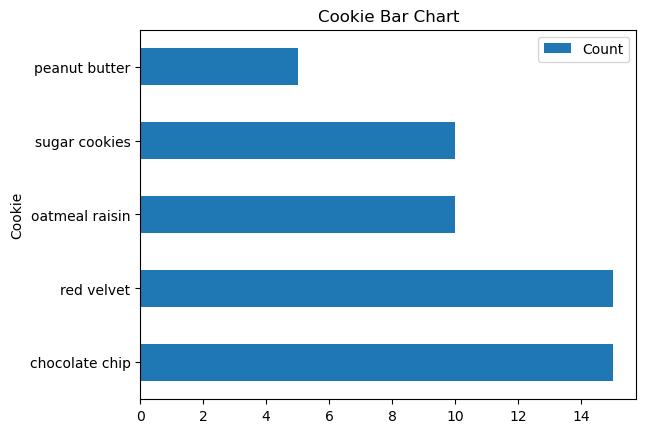

In [3]:
ax=cookieData.plot.barh(x='Cookie',y='Count',title='Cookie Bar Chart')

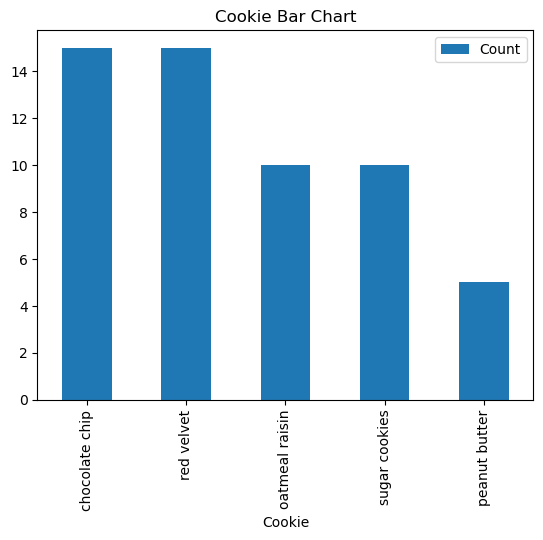

In [5]:
ax=cookieData.plot.bar(x='Cookie',y='Count',title='Cookie Bar Chart')

## Example: Spotify Top Streams

Spotify puts out lists of the top 200 daily global streams. 
I downloaded and parsed this list at this URL: 
https://charts.spotify.com/charts/view/regional-global-daily/2024-02-29

In [2]:
spotifyStreams = pd.read_csv("regional-global-daily-2024-02-29.csv")
spotifyStreams.head(5)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
0,1,spotify:track:6tNQ70jh4OwmPGpYy6R2o9,Benson Boone,Beautiful Things,"Night Street Records, Inc./Warner Records Inc.",1,1,42,6586995
1,2,spotify:track:3w0w2T288dec0mgeZZqoNN,"¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...",CARNIVAL,Ye,1,2,20,6444187
2,3,spotify:track:7AYmToZ5y67fBjq4RLFbuq,Beyoncé,TEXAS HOLD 'EM,Parkwood Entertainment/Columbia,1,3,18,5162841
3,4,spotify:track:3qhlB30KknSejmIvZZLjOD,Djo,End of Beginning,Djo,4,7,13,4791284
4,5,spotify:track:3rUGC1vUpkDG9CZFHMur1t,Tate McRae,greedy,RCA Records Label,1,4,168,4613140


Note that this data frame has the following attributes.

In [24]:
spotifyStreams.columns.values

array(['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank',
       'previous_rank', 'days_on_chart', 'streams'], dtype=object)

It's always good to know what these mean. For now we will work with the following:
- rank: what the rank is from 1 - 200.
- uri: the digital spotify identifier.
- artist_names: the listed performers.
- track-name: the name of the track
- source: the record/production company
- peak_rank: the top rank achieved by the song.
- previous_rank: the rank the song had yesterday (-1  if it wasn't in the top 200)
- days_on_chart: how many days it's been in the top 200.
- streams: the number of streams per day globally

Let's use our barchart command from above to make a bar chart of your choice! Of these top 10.

First - let's make a smaller data frame with just these top 10.

In [29]:
top10 = spotifyStreams.head(10)

Then use what you learned above to make a bar chart here! (Try Horizontal and vertical ones!)

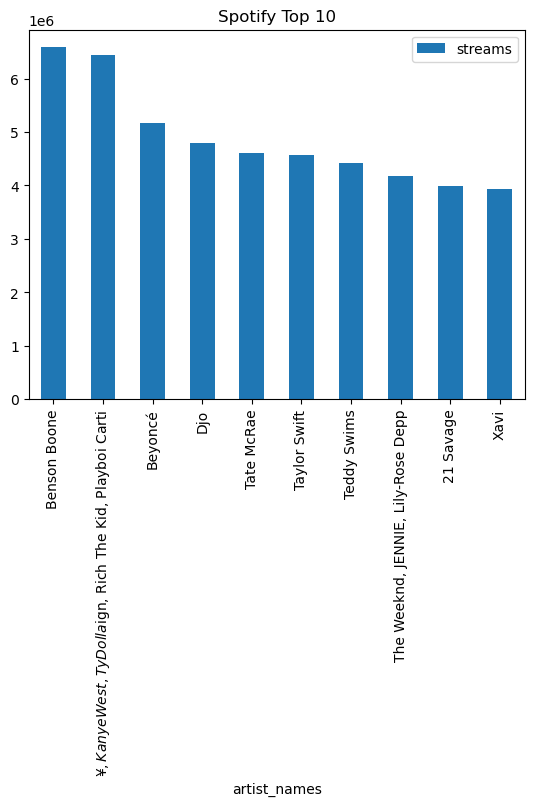

In [6]:
#Vertical
ax=top10.plot.bar(x='artist_names',y='streams',title='Spotify Top 10')

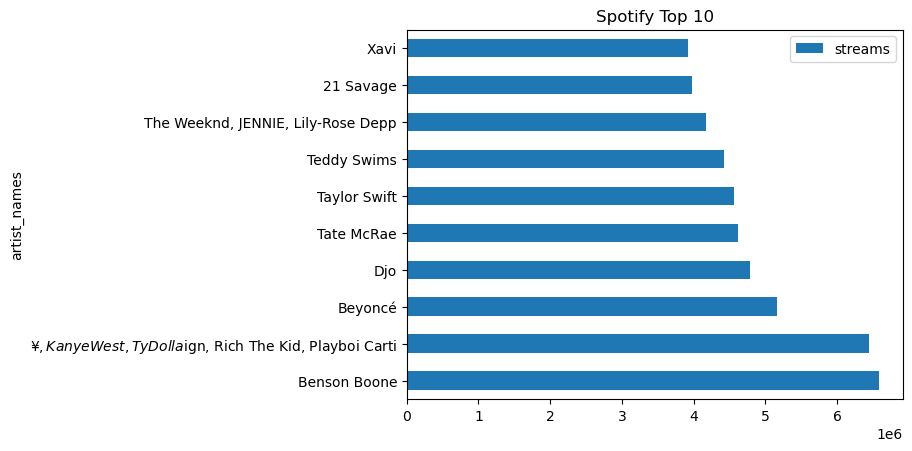

In [7]:
#Horizontal Bar Chart.
ax=top10.plot.barh(x='artist_names',y='streams',title='Spotify Top 10')

### Categorical Distribution by Artist

We will continue to analyze the number of streams per song. But we can also do other fun types of distributions.

For example, there are artists that have more than 1 song on the Top 200 list. 

Let's figure out who they are and how many songs they have.

In [25]:
#First let's pull out only the artists names and take a look. 
artists = spotifyStreams['artist_names']
artists

0                                           Benson Boone
1      ¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...
2                                                Beyoncé
3                                                    Djo
4                                             Tate McRae
                             ...                        
195             Peso Pluma, Gabito Ballesteros, Junior H
196                                                Morat
197                             USHER, Lil Jon, Ludacris
198                                               Eminem
199                                                 d4vd
Name: artist_names, Length: 200, dtype: object

In [26]:
#Now let's make a separate data-frame and use .value_counts() to determine the number of unique artist names.
artistsAndCounts = spotifyStreams['artist_names'].value_counts()
artistsAndCounts

artist_names
Taylor Swift                            7
Bruno Mars                              4
The Weeknd                              4
Eminem                                  4
Arctic Monkeys                          4
                                       ..
Calle 24, Chino Pacas, Fuerza Regida    1
Bryson Tiller                           1
Oscar Ortiz, Edgardo Nuñez              1
Sophie Ellis-Bextor                     1
USHER, Lil Jon, Ludacris                1
Name: count, Length: 157, dtype: int64

Now let's make a horizontal bar chart of the first 20 artists.

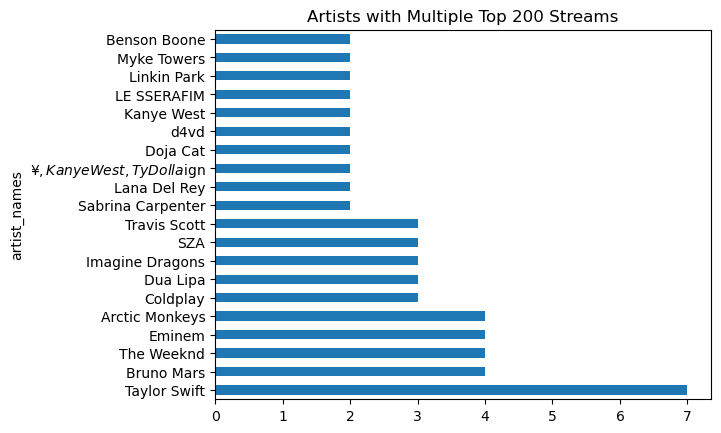

In [27]:
top20ArtistsAndCounts = artistsAndCounts.head(20);
ax=top20ArtistsAndCounts.plot.barh(x='artist_names',
        y='count',title='Artists with Multiple Top 200 Streams')

### Adjusting the Order of the Categories (sort_values)

In the bar plots we have shown, the ordering of values is chosen by our ordering in our data frame or series. 

We can pick a different ordering using sort_values().

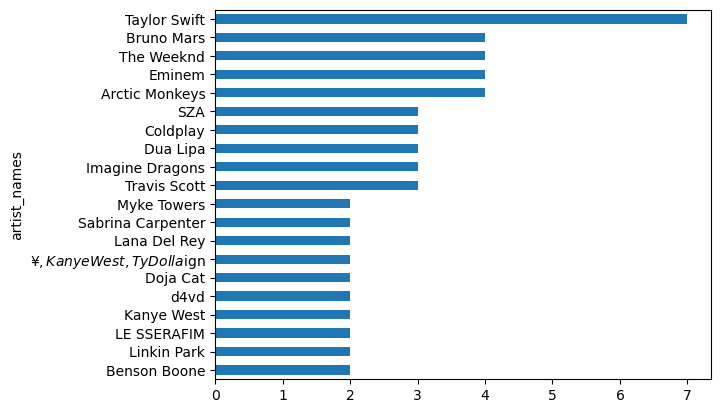

In [28]:
#Since the ArtistsAndCounts has only 1 attribute (the counts).
#We just sort it to plot is in the reverse order from barh().
ax = top20ArtistsAndCounts.sort_values().plot.barh()

Now let's look at an array with a different set of attributes. 

Let's grab the top songs, and the number of weeks a song has been on the top 200. 

In [37]:
top10TracksByDaysOnChart = top10[['track_name','days_on_chart']]
top10TracksByDaysOnChart

,track_name,days_on_chart
0,Beautiful Things,42
1,CARNIVAL,20
2,TEXAS HOLD 'EM,18
3,End of Beginning,13
4,greedy,168
5,Cruel Summer,389
6,Lose Control,106
7,"One Of The Girls (with JENNIE, Lily Rose Depp)",145
8,redrum,49
9,La Diabla,84


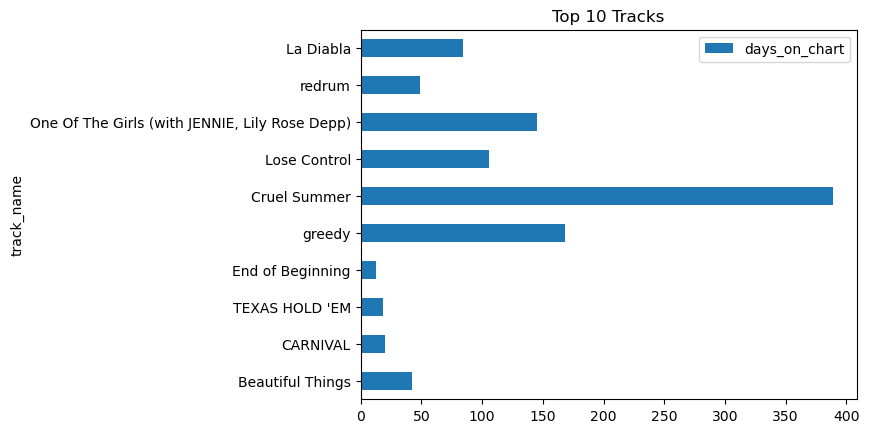

In [45]:
ax = top10TracksByDaysOnChart.plot.barh(x='track_name',title='Top 10 Tracks')

In [46]:
top10TracksByDaysOnChart.sort_values('days_on_chart')

,track_name,days_on_chart
3,End of Beginning,13
2,TEXAS HOLD 'EM,18
1,CARNIVAL,20
0,Beautiful Things,42
8,redrum,49
9,La Diabla,84
6,Lose Control,106
7,"One Of The Girls (with JENNIE, Lily Rose Depp)",145
4,greedy,168
5,Cruel Summer,389


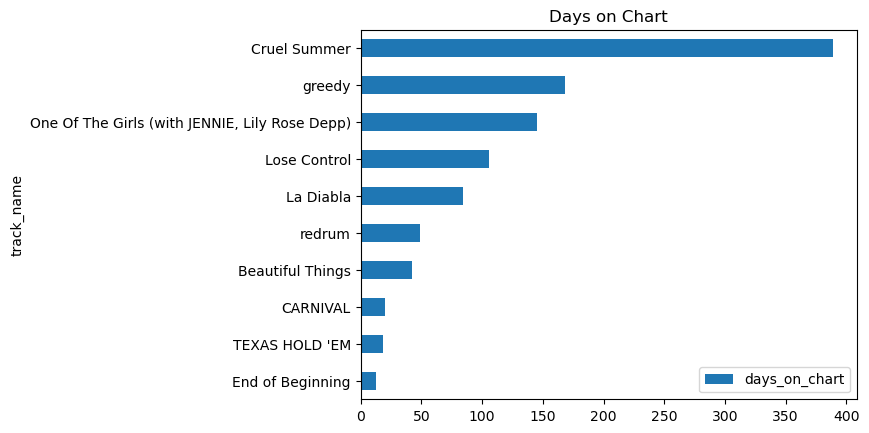

In [48]:
ax = top10TracksByDaysOnChart.sort_values('days_on_chart').plot.barh(x='track_name',title='Days on Chart')

### Quick Check 1

Our previous examples used only the top 10 songs by daily stream. But we have 200 songs in total. Go back to the original data frame and use .sort_values() to find the songs on our list with the greatest number of days on the charts.

Fill in the blanks to make a bar chart of the create a bar chart of the top 10 songs by days on chart. 

In [ ]:
allTracksByDaysOnCharts = spotifyStreams[['track_name','days_on_chart']]
ax = allTracksByDaysOnCharts.sort_values(...).head(...).plot.barh(...)

### Selecting Certain Types of Values. 

We have learned how to access different types of values in a data frame.

- **head(n)** and **tail(n)** give us the first and last values;
- we can use binary filtering to get other values;
- we can also use **take()** to get any number of values;

We have already seen how to use head() so we will show again how to use binary filtering and then take.

For example, let's use binary filtering to get the songs corresponding to Taylor Swift in this data frame.

In [57]:
spotifyStreams['artist_names']=='Taylor Swift'

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: artist_names, Length: 200, dtype: bool

We have a binary vector that only has True when Taylor Swift is in the field 'artists_names'.

Let's pull out only the rows corresponding to Taylor Swift

In [38]:
filter = spotifyStreams['artist_names']=='Taylor Swift';
onlyTaylorStreams = spotifyStreams[filter]

In [71]:
onlyTaylorStreams[['track_name','streams']]

,track_name,streams
5,Cruel Summer,4562959
57,Lover,1871773
63,Anti-Hero,1847514
97,cardigan,1610149
104,Is It Over Now? (Taylor's Version) (From The V...,1543128
127,Don’t Blame Me,1437898
147,august,1322032


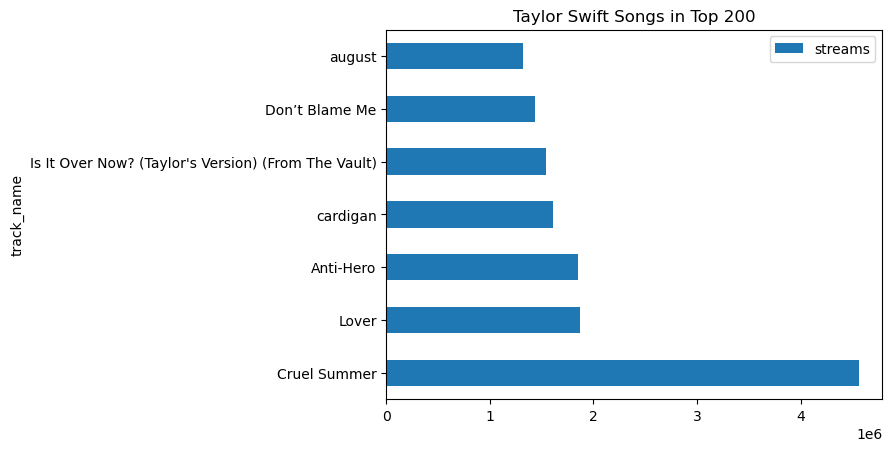

In [72]:
ax = onlyTaylorStreams[['track_name','streams']].plot.barh(x='track_name',title='Taylor Swift Songs in Top 200')

Now let's move onto **take()**. Here we can specify any number of rows to pull out. 

In [8]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We can now pull out the first 10 rows.

In [31]:
top_10 = spotifyStreams.take(np.arange(10))

### Quick Check 2

Fill in the blank to generate a bar chart of the top 15 streamed songs  showing how many streams each artist has.

In [ ]:
top15 = spotifyStreams.take(np.arange(...))[['track_name','streams']];
ax = top15.sort_values(...).plot.barh(x='track_name',title='Top 15 Streams')

### Separate Bar Charts

There's times when we want barcharts to show more information on the same plot.

Let's look at combining the rank of the top 10 songs with their peak rank of all times.

First let's look at the rank of the top 10 songs.

In [18]:
top10 = spotifyStreams.head(10)

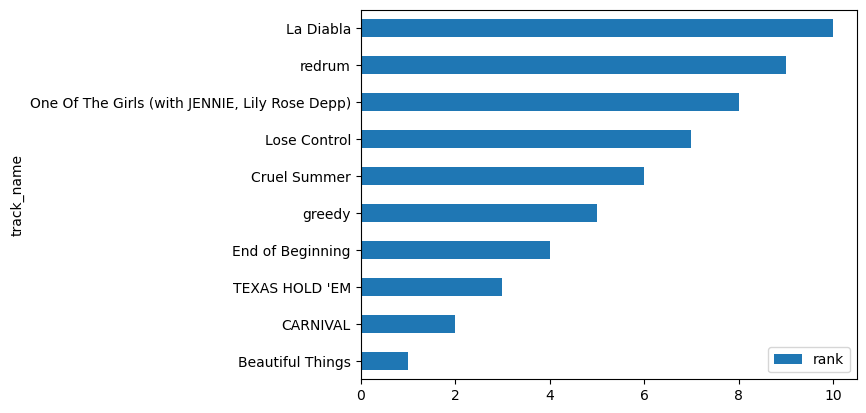

In [19]:
ax = top10.plot.barh(x='track_name',y='rank')

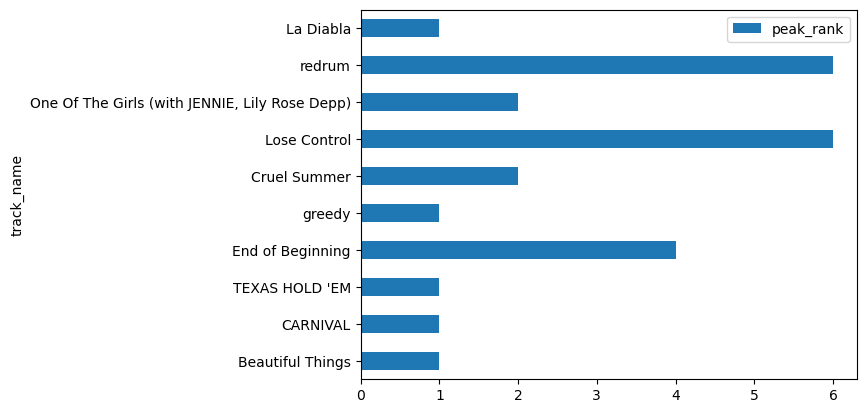

In [20]:
ax = top10.plot.barh(x='track_name',y='peak_rank')

Remarkably, Pandas is very cool and if we give barh more than 1 value, it will plot them both. Let's look at this example. 

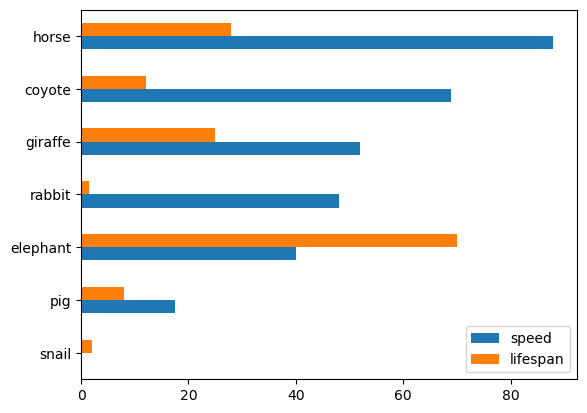

In [21]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.barh()

Now let's do this with our top10 values!

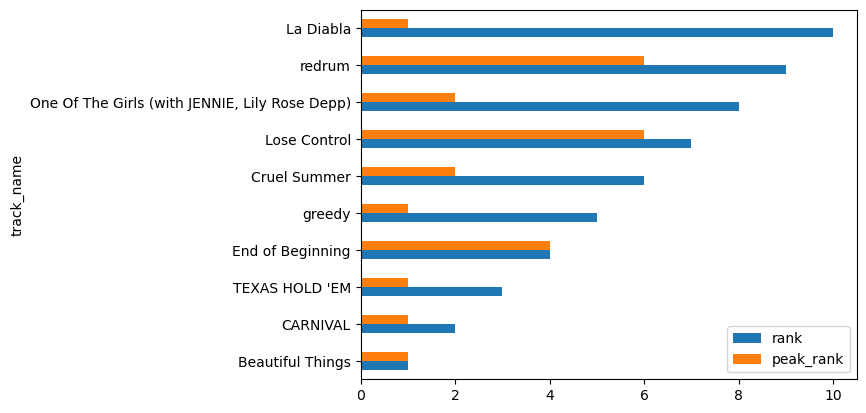

In [50]:
ax = top10[['track_name','rank','peak_rank']].plot.barh(x='track_name')

In [51]:
top10[['track_name','rank','peak_rank']]

,track_name,rank,peak_rank
0,Beautiful Things,1,1
1,CARNIVAL,2,1
2,TEXAS HOLD 'EM,3,1
3,End of Beginning,4,4
4,greedy,5,1
5,Cruel Summer,6,2
6,Lose Control,7,6
7,"One Of The Girls (with JENNIE, Lily Rose Depp)",8,2
8,redrum,9,6
9,La Diabla,10,1
